# MEME Coin (DOGE Coin ~ DOGE) Price Prediction using Regression

In [1]:
# In this project, we are going to predict the price values of Doge Coin (DOGE), a MEME token, with the help of
# -Regression method. We will be taking more than 10 years historic data of Doge Coin from CoinGecko for this test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.layers import Input, Dense
sns.set()

2025-03-07 23:40:14.131019: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
Doge = pd.read_excel('/Users/pankit/Downloads/DOGE_hist-2.xlsx')
Doge.tail(5)

,snapped_at,Date,Price,market_cap,total_volume
4091,2025-03-02 00:00:00 UTC,02-03-2025,0.206364,3.055376e+10,1.157646e+09
4092,2025-03-03 00:00:00 UTC,03-03-2025,0.239848,3.549073e+10,3.097275e+09
4093,2025-03-04 00:00:00 UTC,04-03-2025,0.199208,2.947881e+10,2.740810e+09
4094,2025-03-05 00:00:00 UTC,05-03-2025,0.199210,2.948672e+10,2.339672e+09
4095,2025-03-06 00:00:00 UTC,06-03-2025,0.204725,3.037256e+10,1.407399e+09


In [4]:
# The downloaded file contained 4 columns expect 'Date'. We created one for column called 'Date' by refering
# -the values from 'snapped_at' column for easy understanding and execution.
# We have taken data from 2013 to 2025.

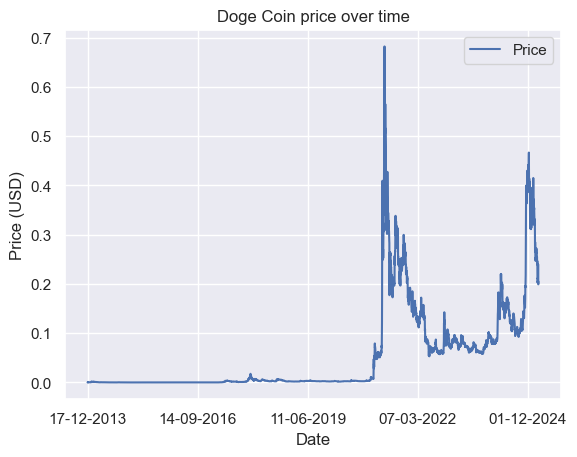

In [5]:
ax = Doge.plot(x='Date', y='Price')
ax.set_title("Doge Coin price over time")
ax.set_xlabel("Date")
ax.set_ylabel("Price (USD)")
plt.show()

In [6]:
#Splitting the data as training and testing

#Creating a new column called PREDICTION which is created using shifted rows of 'Price'

shifted_rows = 100
Doge['Prediction'] = Doge[['Price']].shift(-shifted_rows)
print(Doge['Prediction'])

0       0.000530
1       0.000615
2       0.000531
3       0.000502
4       0.000536
          ...   
4091         NaN
4092         NaN
4093         NaN
4094         NaN
4095         NaN
Name: Prediction, Length: 4096, dtype: float64


In [7]:
#In this step, we are creating training data for X. 
#This values will be used to train the model

training_data = np.array(Doge[['Price']][:-shifted_rows])
print(training_data)


#Creating training data for Y
y = (Doge['Prediction'].values)[:-shifted_rows]
print(y)

[[2.18176000e-04]
 [2.67749000e-04]
 [4.75099000e-04]
 ...
 [4.29588428e-01]
 [4.29861391e-01]
 [3.92787742e-01]]
[0.00052974 0.00061512 0.00053104 ... 0.19920802 0.19921022 0.20472544]


In [8]:
# 80% of training_data will go to the variable called x_train
# 20% of training_data will go to the variable called x_test

# 80% of y will go to the variable called y_train
# 20% of y will go to the variable called y_test

x_train, x_test, y_train, y_test = train_test_split(training_data, y, test_size =20)

# 80% of data is for training, 20% of data is for testing

Linear Regression Model

In [9]:
#Now, at first, we define the model. then we fit the model and get the score(between 0 and 1)

LReg = LinearRegression()
LReg.fit(x_train, y_train)
LReg_confidence = LReg.score(x_test, y_test)
print(LReg_confidence)

0.36443230692892126


In [10]:
#Testing the model

future_values = np.array(Doge[['Price']][-shifted_rows:])
LReg_prediction = LReg.predict(future_values)

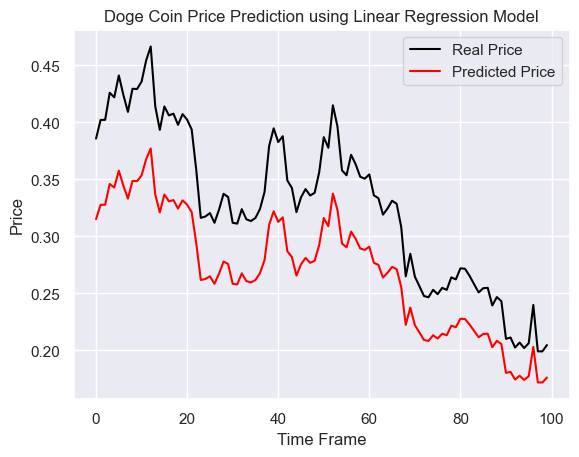

In [11]:
#Ploting the Results

plt.plot(future_values, 'Black', label = 'Real Price')
plt.plot(LReg_prediction, 'Red', label = 'Predicted Price')
plt.xlabel('Time Frame')
plt.ylabel('Price')
plt.title('Doge Coin Price Prediction using Linear Regression Model')
plt.legend()
plt.show()

In [12]:
# Here, based on the plot, we can conclude that this is not a better model since there is a difference 
# -between the 'Real Price' and the 'Predicted Price'

#Hence, we go to the next model, Support Vector Regression

Support Vector Regression

In [13]:
# At first we will be defining two SVR model with different parameters and compare them

svr_rbf = SVR(kernel='rbf', C=1e2, gamma=0.01)
svr_poly = SVR(kernel='poly', C=1e2, degree=2)


# Now we fit the model with rbf kernel and poly kernel
y_rbf = svr_rbf.fit(x_train, y_train)
y_poly = svr_poly.fit(x_train, y_train)

In [14]:
# Now we predict the future values

future_values = np.array(Doge[['Price']][-shifted_rows:])
y_rbf_prediction = svr_rbf.predict(future_values)
y_poly_prediction = svr_poly.predict(future_values)

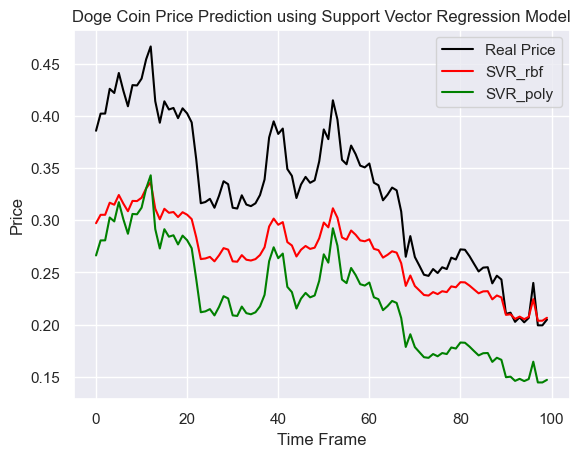

In [15]:
# Plot the results

plt.plot(future_values, 'Black', label = 'Real Price')
plt.plot(y_rbf_prediction, 'Red', label = 'SVR_rbf')
plt.plot(y_poly_prediction, 'Green', label = 'SVR_poly')
plt.xlabel('Time Frame')
plt.ylabel('Price')
plt.title('Doge Coin Price Prediction using Support Vector Regression Model')
plt.legend()
plt.show()

In [16]:
# Now, based on the plot, we can conclude that this is not a better model.
# We will go to the next model, which is Neural Network Model


Neural Network Model

In [18]:
NN_model = Sequential()

# Input Layer
NN_model.add(Dense(128, kernel_initializer='normal', input_dim = x_train.shape[1], activation ='relu'))

# Hidden Layers
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))

# The Output Layer
NN_model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# Compiling the network
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

NN_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split = 0.2)


/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,121 (645.00 KB)

 Trainable params: 165,121 (645.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - val_loss: 0.0246 - val_mean_absolute_error: 0.0246
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - val_loss: 0.0239 - val_mean_absolute_error: 0.0239
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - val_loss: 0.0238 - val_mean_absolute_error: 0.0238
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - val_loss: 0.0226 - val_mean_absolute_error: 0.0226
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - val_loss: 0.0227 - val_mean_absolute_error: 0.0227
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - val_loss: 0.0231 - val_mean_absolute_error: 0.0231
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - v

In [20]:
# Testing the Neural Network

future_values = np.array(Doge[['Price']][-shifted_rows:])
NN_pred = NN_model.predict(future_values)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


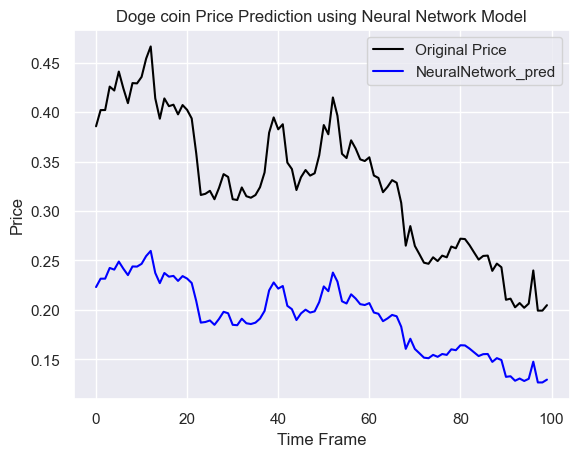

In [21]:
#Plot the result
plt.plot(future_values, 'Black', label='Original Price')
plt.plot(NN_pred, 'Blue', label='NeuralNetwork_pred')
plt.xlabel('Time Frame')
plt.ylabel('Price')
plt.title('Doge coin Price Prediction using Neural Network Model')
plt.legend()
plt.show()


In [ ]:
# Comparing to all three models, we can come to the conclusion that Linear Regression Model displayed the nearest
# price prediction compared to Support Vector and Neural Network model.

# We conclude Linear Regression as the best model to fit in this project